# Библиотеки
**Текст, выделенный полужирным шрифтом**

In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from itertools import combinations

# **Обработка данных**

In [89]:
df = pd.read_excel('dataset_input.xlsx')
df.head(5)

,Номер,Дата начала,Дата окончания,Количество опасных явлений,Заблаговременность,Название явления,Интенсивность явления,Субъект Российской Федерации,Дополнение
0,1,01.01.1991,03.01.1991,2,8 часов 30 минут,Ветер,26.0,Красноярский край,(юг Таймыра)
1,1,01.01.1991,03.01.1991,2,8 часов 30 минут,Метель,50.0,Красноярский край,(юг Таймыра)
2,2,03.01.1991,05.01.1991,2,18-30 часов,Снег,370.0,Сахалинская область,(о.Сахалин)
3,2,03.01.1991,05.01.1991,2,18-30 часов,Сход снежных лавин,9999.0,Сахалинская область,(о.Сахалин)
4,3,11.01.1991,15.01.1991,1,2-3 суток,РИП,9999.0,Чеченская Республика,NaN


In [90]:
df = df.drop(columns=['Номер ', 'Количество опасных явлений', 'Заблаговременность ', 'Дополнение'])

In [91]:
df.columns = df.columns.str.strip()

df['Дата начала'] = pd.to_datetime(df['Дата начала'], format='%d.%m.%Y')
df['Дата окончания'] = pd.to_datetime(df['Дата окончания'], format='%d.%m.%Y')

In [92]:
df['Продолжительность'] = (df['Дата окончания'] - df['Дата начала']).dt.days

In [93]:
df[df['Продолжительность'] < 0]

,Дата начала,Дата окончания,Название явления,Интенсивность явления,Субъект Российской Федерации,Продолжительность
12107,2016-06-15,2015-06-15,Град,30.0,Кабардино-Балкарская Республика,-366
12587,2017-05-24,2017-04-29,Паводок,9999.0,Краснодарский край,-25


In [94]:
# Исправляем данные вручную для строк с индексами 12107 и 12587
df.loc[12107, 'Дата начала'] = pd.to_datetime('2016-06-15', format='%Y-%m-%d')
df.loc[12107, 'Дата окончания'] = pd.to_datetime('2016-06-15', format='%Y-%m-%d')

df.loc[12587, 'Дата начала'] = pd.to_datetime('2017-04-29', format='%Y-%m-%d')
df.loc[12587, 'Дата окончания'] = pd.to_datetime('2017-05-24', format='%Y-%m-%d')

# Пересчитываем продолжительность после изменения дат
df['Продолжительность'] = (df['Дата окончания'] - df['Дата начала']).dt.days

# Проверим результат
df.loc[[12107, 12587], ['Дата начала', 'Дата окончания', 'Продолжительность']]

,Дата начала,Дата окончания,Продолжительность
12107,2016-06-15,2016-06-15,0
12587,2017-04-29,2017-05-24,25


In [95]:
federal_districts = {
    # Центральный федеральный округ
    'Белгородская область': 'Центральный',
    'Брянская область': 'Центральный',
    'Владимирская область': 'Центральный',
    'Воронежская область': 'Центральный',
    'Ивановская область': 'Центральный',
    'Калужская область': 'Центральный',
    'Костромская область': 'Центральный',
    'Курская область': 'Центральный',
    'Липецкая область': 'Центральный',
    'Москва': 'Центральный',
    'Московская область': 'Центральный',
    'Орловская область': 'Центральный',
    'Рязанская область': 'Центральный',
    'Смоленская область': 'Центральный',
    'Тамбовская область': 'Центральный',
    'Тверская область': 'Центральный',
    'Тульская область': 'Центральный',
    'Ярославская область': 'Центральный',

    # Северо-Западный федеральный округ
    'Архангельская область': 'Северо-Западный',
    'Вологодская область': 'Северо-Западный',
    'Калининградская область': 'Северо-Западный',
    'Ленинградская область': 'Северо-Западный',
    'Мурманская область': 'Северо-Западный',
    'Новгородская область': 'Северо-Западный',
    'Псковская область': 'Северо-Западный',
    'Республика Карелия': 'Северо-Западный',
    'Республика Коми': 'Северо-Западный',
    'Санкт-Петербург': 'Северо-Западный',
    'Ненецкий автономный округ': 'Северо-Западный',

    # Южный федеральный округ
    'Астраханская область': 'Южный',
    'Волгоградская область': 'Южный',
    'Краснодарский край': 'Южный',
    'Ростовская область': 'Южный',
    'Республика Адыгея': 'Южный',
    'Республика Калмыкия': 'Южный',
    'Республика Крым': 'Южный',
    'Севастополь': 'Южный',

    # Северо-Кавказский федеральный округ
    'Чеченская Республика': 'Северо-Кавказский',
    'Республика Дагестан': 'Северо-Кавказский',
    'Кабардино-Балкарская Республика': 'Северо-Кавказский',
    'Карачаево-Черкесская Республика': 'Северо-Кавказский',
    'Республика Ингушетия': 'Северо-Кавказский',
    'Республика Северная Осетия - Алания': 'Северо-Кавказский',
    'Ставропольский край': 'Северо-Кавказский',

    # Приволжский федеральный округ
    'Кировская область': 'Приволжский',
    'Нижегородская область': 'Приволжский',
    'Оренбургская область': 'Приволжский',
    'Пензенская область': 'Приволжский',
    'Пермский край': 'Приволжский',
    'Республика Башкортостан': 'Приволжский',
    'Республика Марий Эл': 'Приволжский',
    'Республика Мордовия': 'Приволжский',
    'Республика Татарстан': 'Приволжский',
    'Самарская область': 'Приволжский',
    'Саратовская область': 'Приволжский',
    'Удмуртcкая Республика': 'Приволжский',
    'Ульяновская область': 'Приволжский',
    'Чувашская Республика': 'Приволжский',

    # Уральский федеральный округ
    'Курганская область': 'Уральский',
    'Свердловская область': 'Уральский',
    'Тюменская область': 'Уральский',
    'Ханты-Мансийский автономный округ': 'Уральский',
    'Ямало-Ненецкий автономный округ': 'Уральский',
    'Челябинская область': 'Уральский',

    # Сибирский федеральный округ
    'Алтайский край': 'Сибирский',
    'Забайкальский край': 'Сибирский',
    'Красноярский край': 'Сибирский',
    'Республика Алтай': 'Сибирский',
    'Республика Бурятия': 'Сибирский',
    'Республика Тыва': 'Сибирский',
    'Республика Хакасия': 'Сибирский',
    'Иркутская область': 'Сибирский',
    'Кемеровская область': 'Сибирский',
    'Новосибирская область': 'Сибирский',
    'Омская область': 'Сибирский',
    'Томская область': 'Сибирский',

    # Дальневосточный федеральный округ
    'Амурская область': 'Дальневосточный',
    'Камчатский край': 'Дальневосточный',
    'Магаданская область': 'Дальневосточный',
    'Приморский край': 'Дальневосточный',
    'Республика Саха (Якутия)': 'Дальневосточный',
    'Сахалинская область': 'Дальневосточный',
    'Хабаровский край': 'Дальневосточный',
    'Чукотский автономный округ': 'Дальневосточный',
    'Еврейская автономная область': 'Дальневосточный',
}


df['Федеральный округ'] = df['Субъект Российской Федерации'].map(federal_districts)

In [96]:
df = df.rename(columns={
    'Дата начала': 'Start_Date',
    'Дата окончания': 'End_Date',
    'Название явления': 'Event_Name',
    'Интенсивность явления': 'Event_Intensity',
    'Субъект Российской Федерации': 'Region',
    'Федеральный округ': 'Federal_District',
    'Продолжительность': 'Duration'
})

In [97]:
df.shape

(16535, 7)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16535 entries, 0 to 16534
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Start_Date        16535 non-null  datetime64[ns]
 1   End_Date          16535 non-null  datetime64[ns]
 2   Event_Name        16535 non-null  object        
 3   Event_Intensity   16534 non-null  float64       
 4   Region            16535 non-null  object        
 5   Duration          16535 non-null  int64         
 6   Federal_District  16535 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(3)
memory usage: 904.4+ KB


In [99]:
# mean_intensity = df[df['Event_Intensity'] != 9999]['Event_Intensity'].dropna().mean()
# df['Event_Intensity'].fillna(mean_intensity, inplace=True)

df = df[df['Event_Intensity'] != 9999].dropna()

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8812 entries, 0 to 16534
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Start_Date        8812 non-null   datetime64[ns]
 1   End_Date          8812 non-null   datetime64[ns]
 2   Event_Name        8812 non-null   object        
 3   Event_Intensity   8812 non-null   float64       
 4   Region            8812 non-null   object        
 5   Duration          8812 non-null   int64         
 6   Federal_District  8812 non-null   object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(3)
memory usage: 550.8+ KB


In [101]:
df.to_csv('dataset_output.csv', index=False, encoding='utf-8-sig')

In [102]:
df.head()

,Start_Date,End_Date,Event_Name,Event_Intensity,Region,Duration,Federal_District
0,1991-01-01,1991-01-03,Ветер,26.0,Красноярский край,2,Сибирский
1,1991-01-01,1991-01-03,Метель,50.0,Красноярский край,2,Сибирский
2,1991-01-03,1991-01-05,Снег,370.0,Сахалинская область,2,Дальневосточный
15,1991-01-11,1991-01-12,Ветер,27.0,Республика Башкортостан,1,Приволжский
17,1991-01-13,1991-01-13,Ветер,29.0,Мурманская область,0,Северо-Западный


# **Анализ средней интенсивности и продолжительности погодных явлений по федеральным округам**

**Цель анализа:** Оценить как интенсивность, так и продолжительность погодных явлений в различных федеральных округах России.

In [103]:
def plot_average_intensity_by_district(df, event_name):
    event_df = df[df['Event_Name'] == event_name]

    avg_intensity_by_district = event_df.groupby('Federal_District')['Event_Intensity'].mean().sort_values(ascending=False)

    sns.set(style="whitegrid")

    plt.figure(figsize=(12, 6))
    ax = avg_intensity_by_district.plot(kind='bar', color=sns.color_palette("viridis", len(avg_intensity_by_district)))

    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    fontsize=10, color='black',
                    xytext=(0, 5), textcoords='offset points')

    plt.title(f'Средняя интенсивность "{event_name}" по федеральным округам', fontsize=14, fontweight='bold')
    plt.xlabel('Федеральный округ', fontsize=12)
    plt.ylabel('Средняя интенсивность', fontsize=12)

    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.tight_layout()

    plt.show()

> **Анализ средней интенсивности:** \
Функция `plot_average_intensity_by_district` вычисляет среднюю интенсивность каждого типа погодного явления по федеральным округам и визуализирует эти данные с помощью столбчатых графиков.

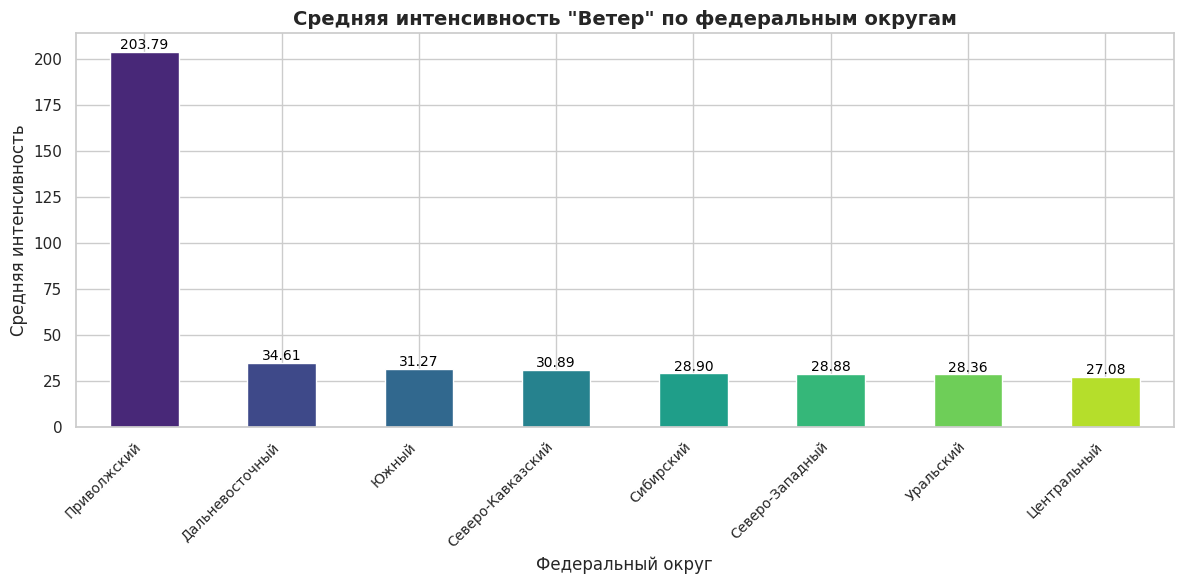

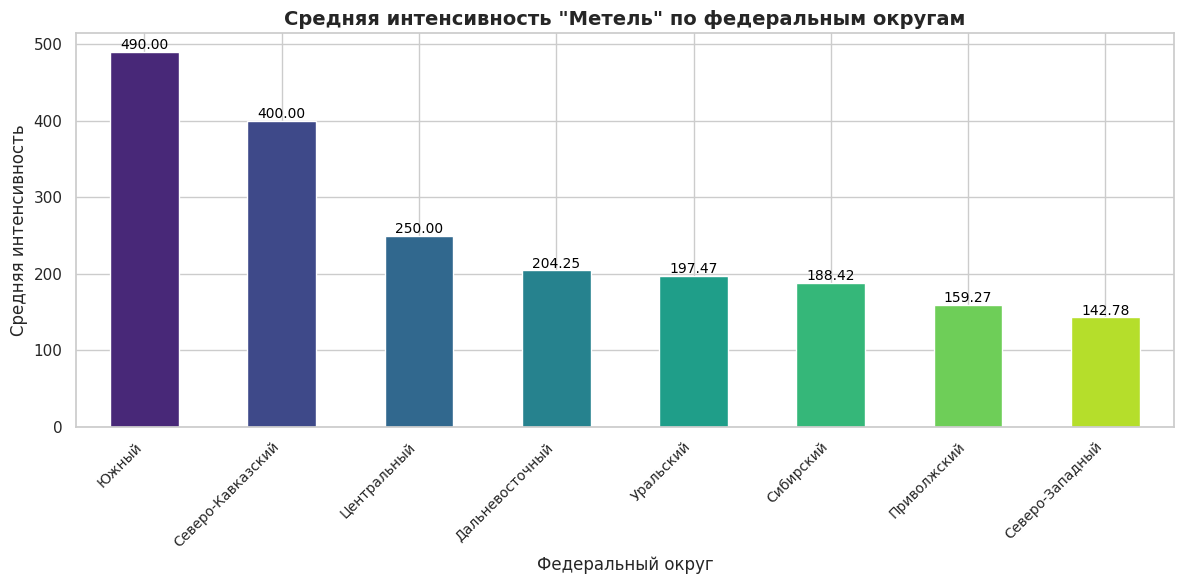

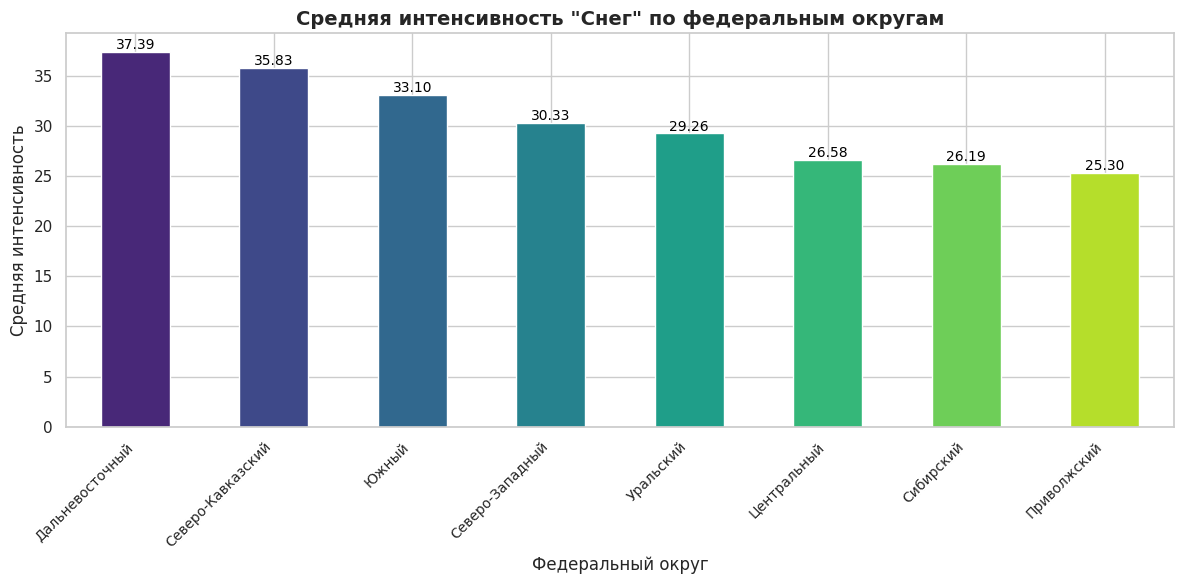

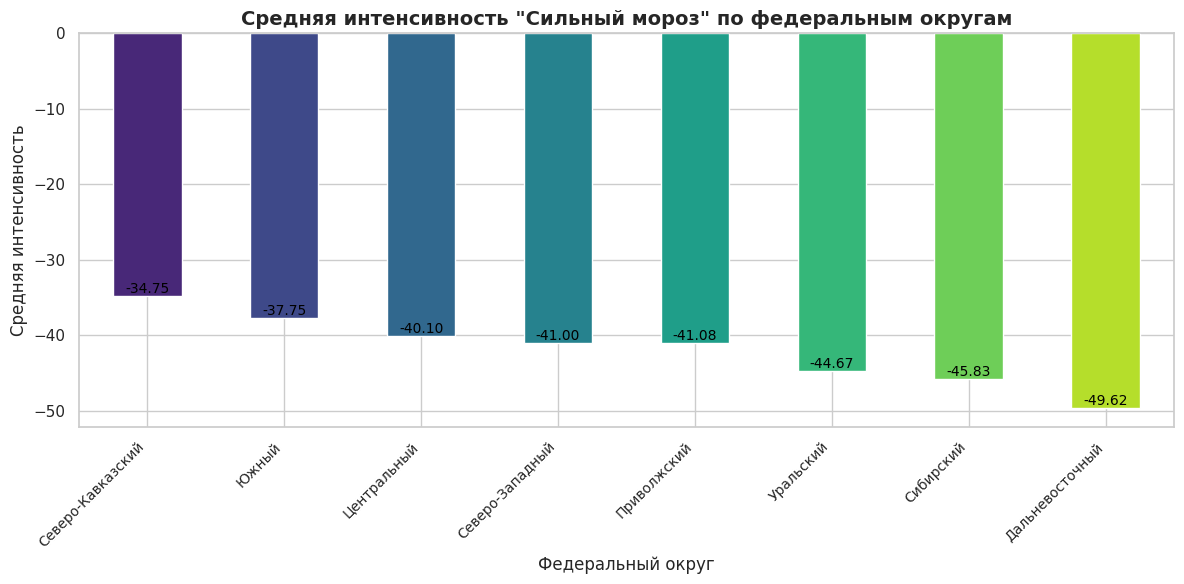

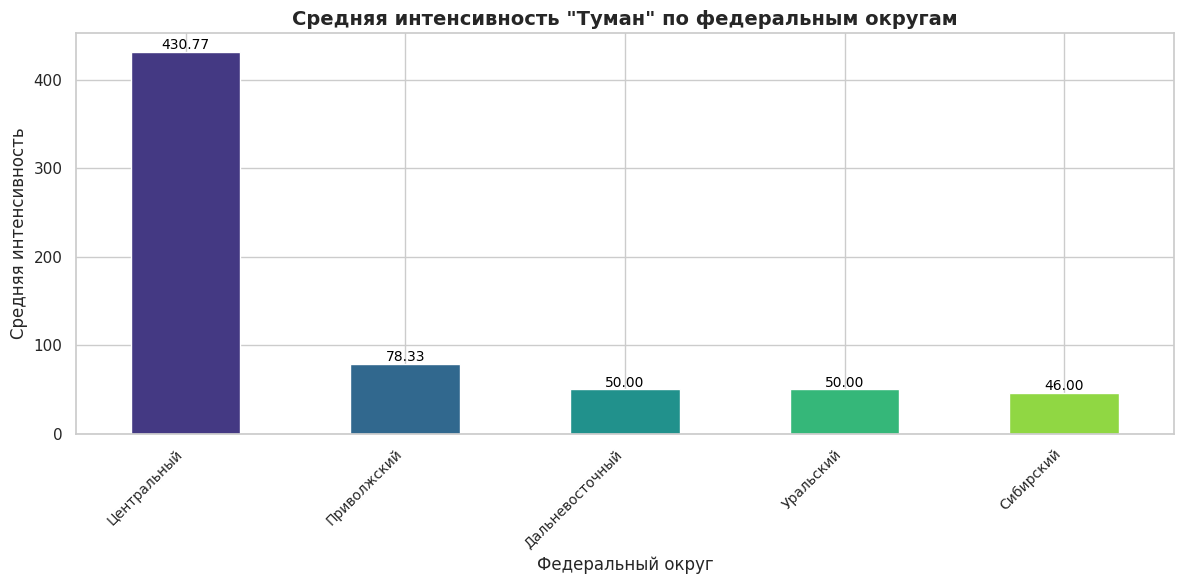

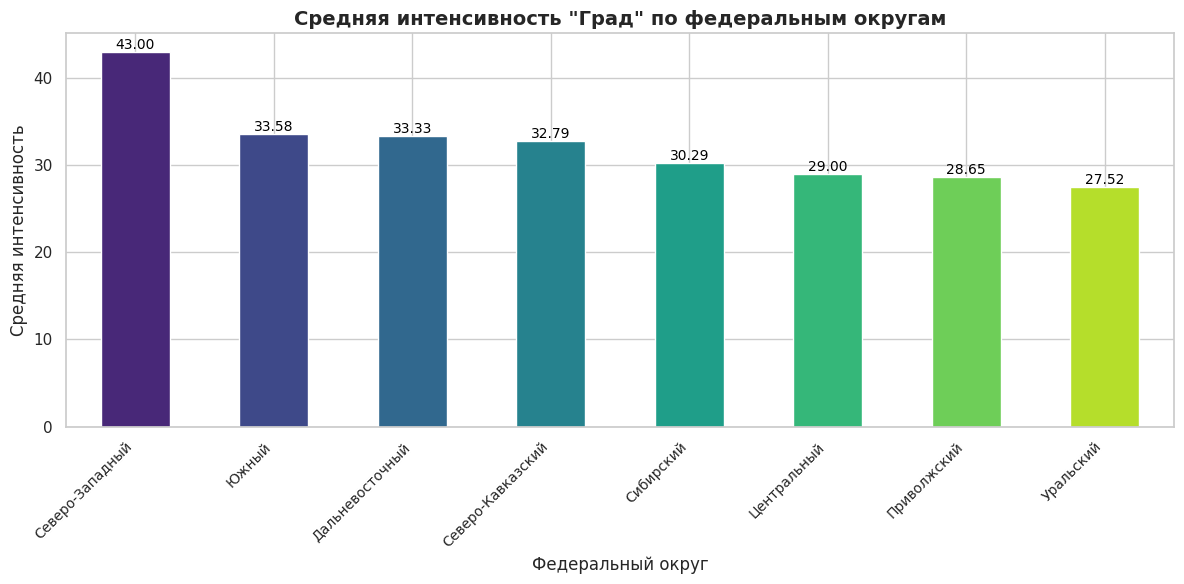

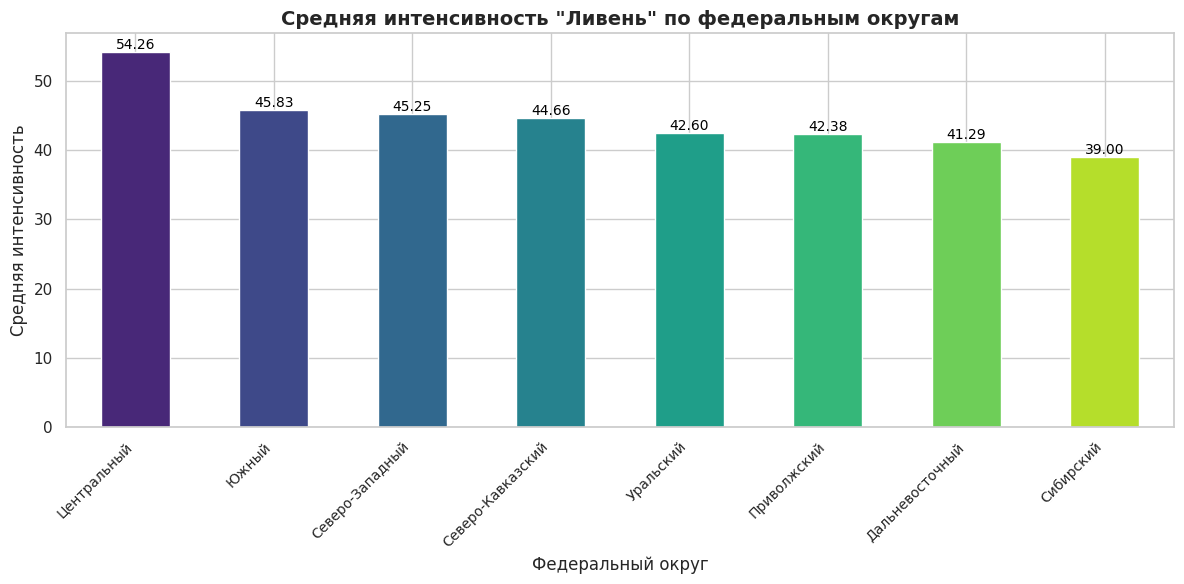

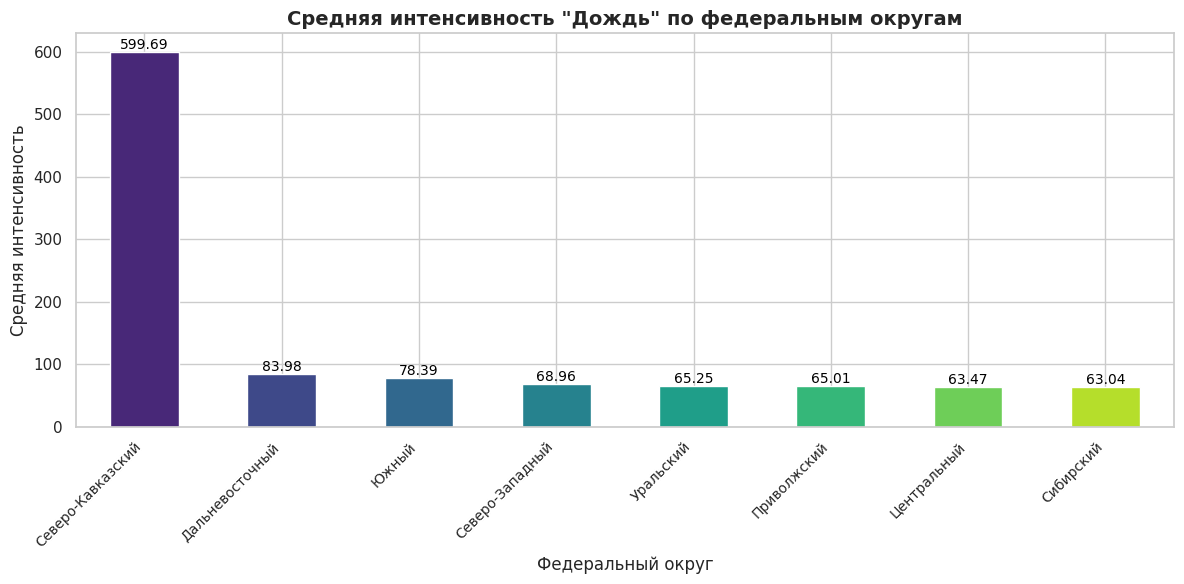

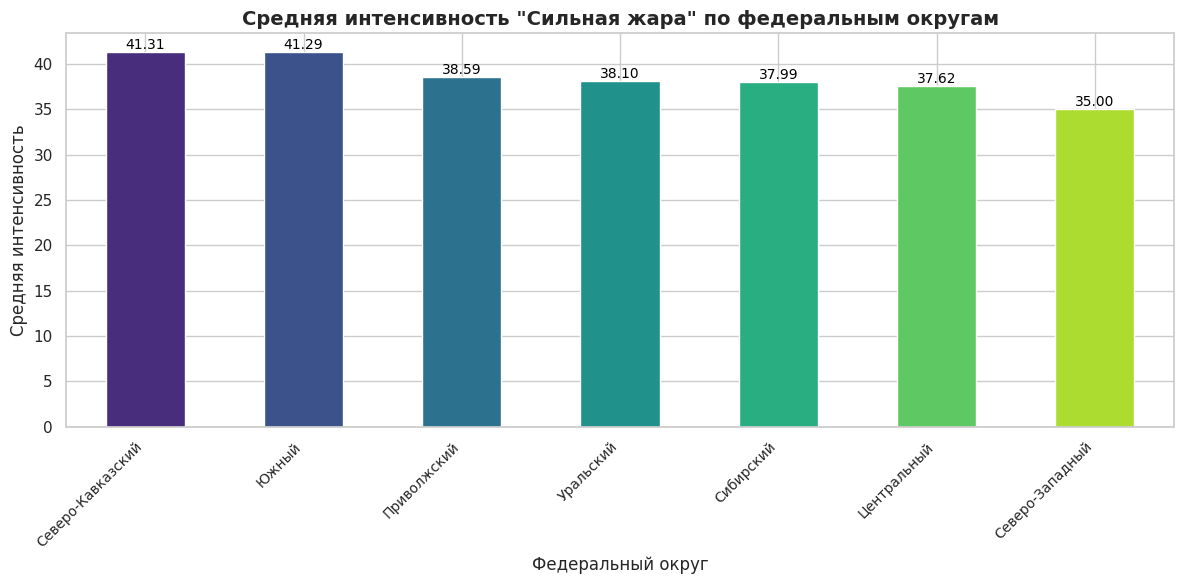

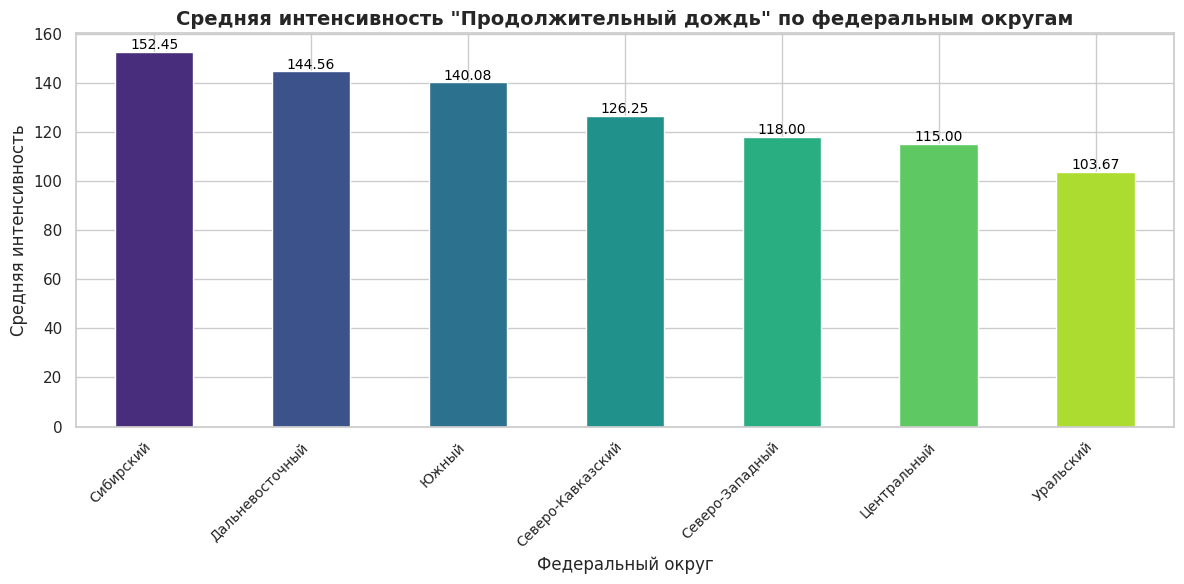

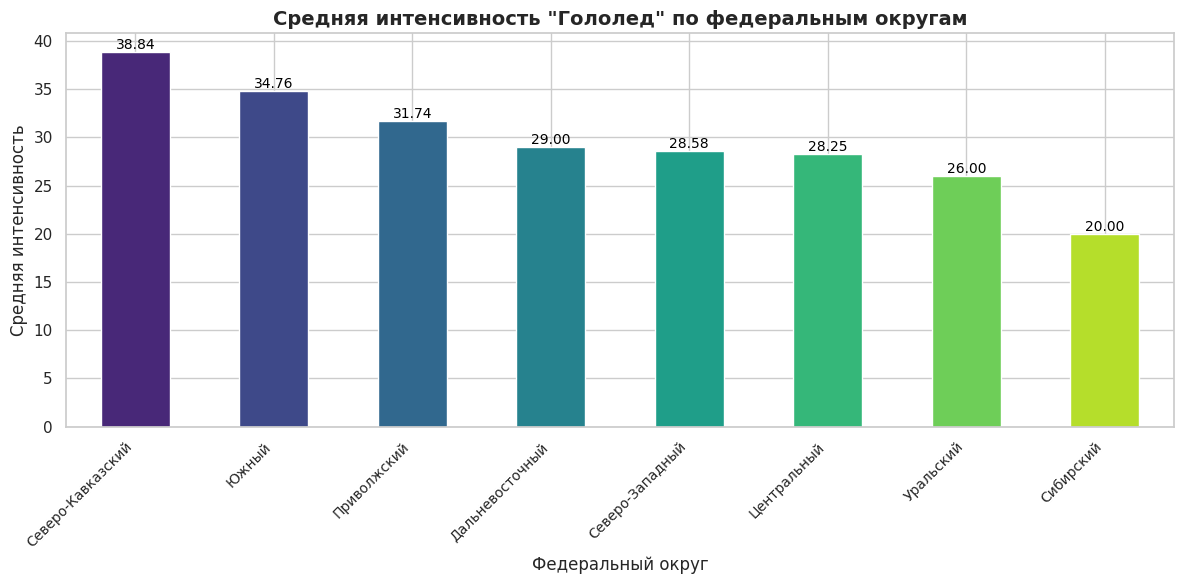

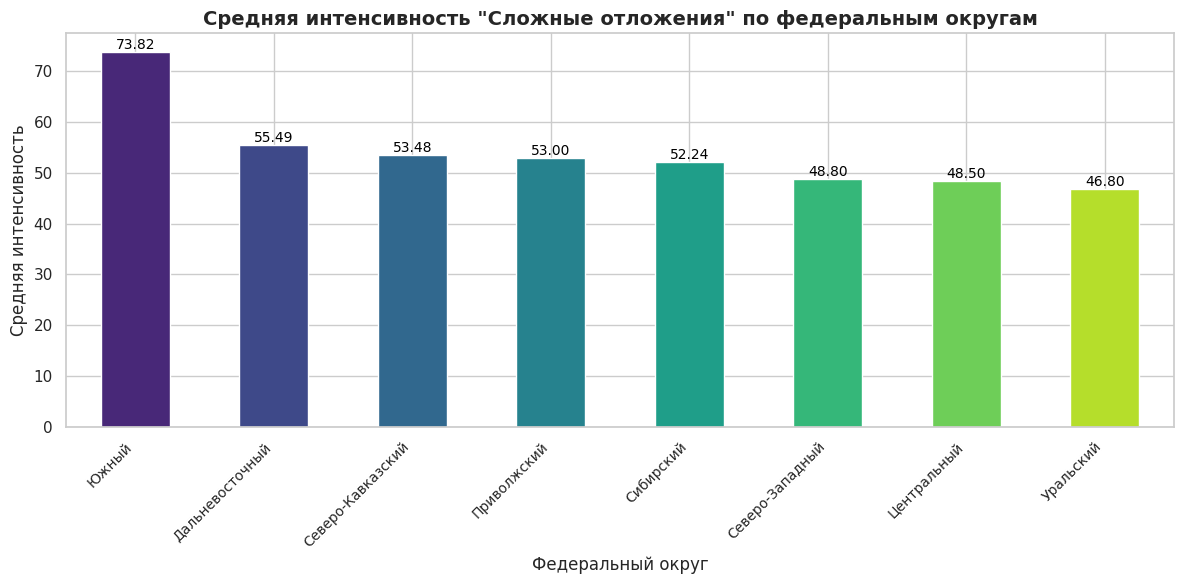

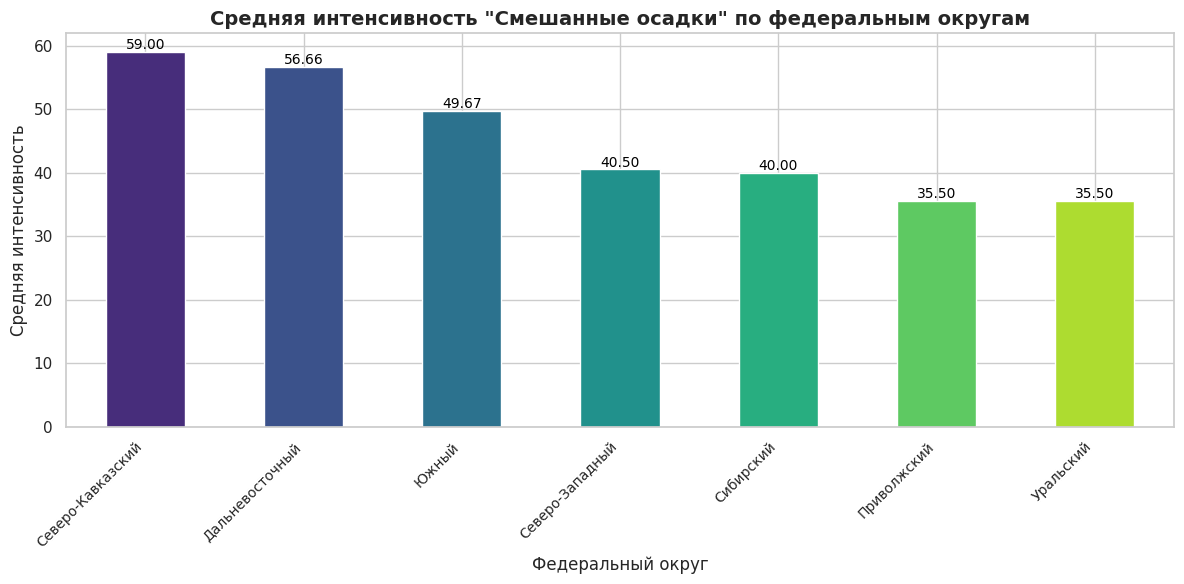

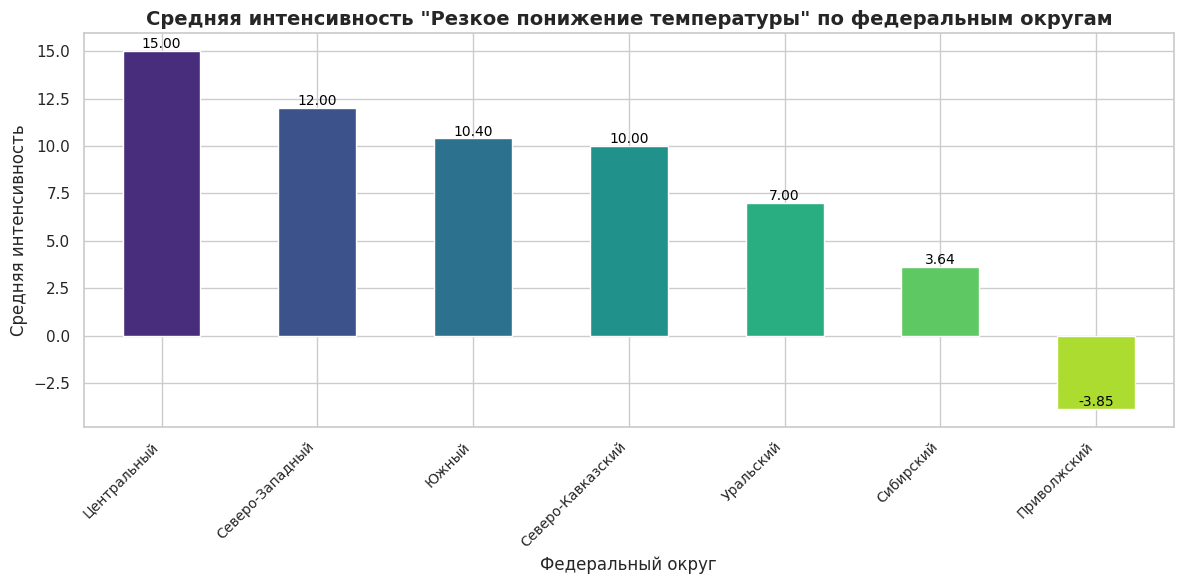

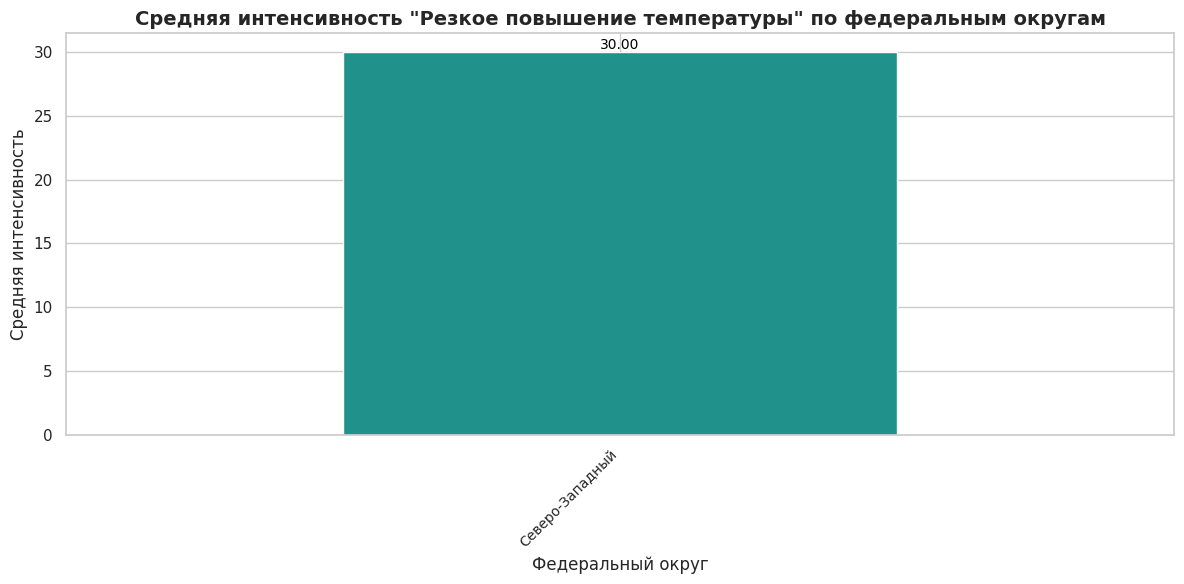

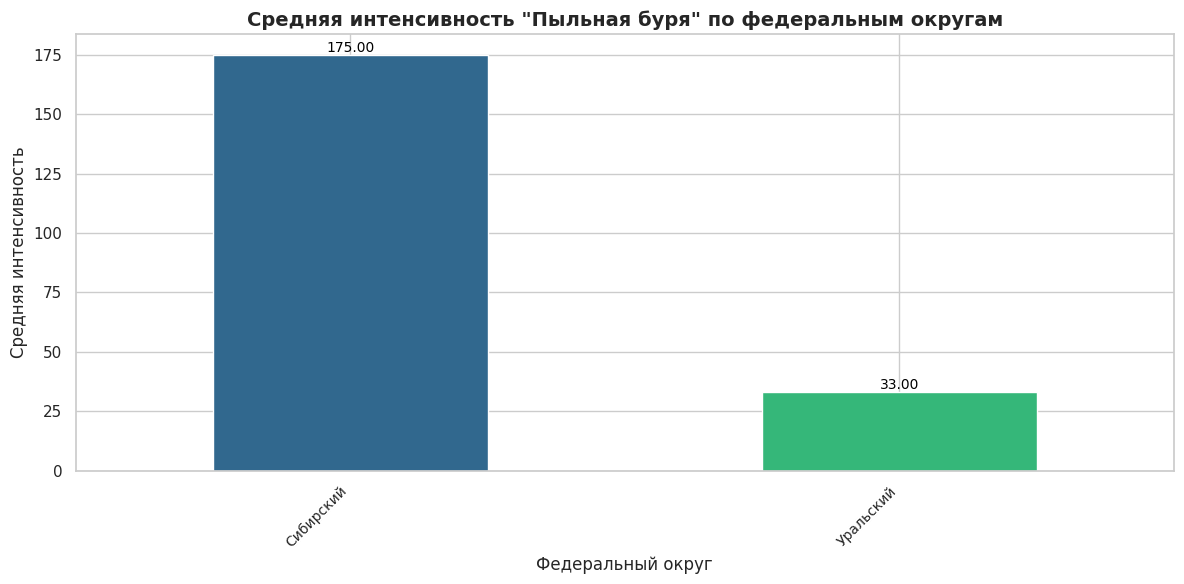

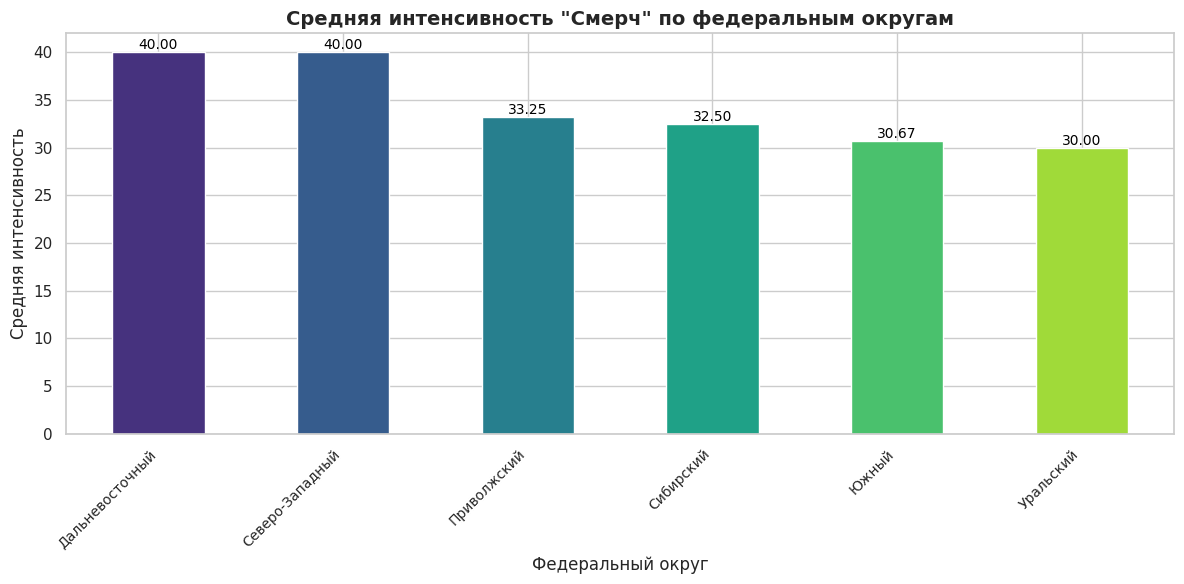

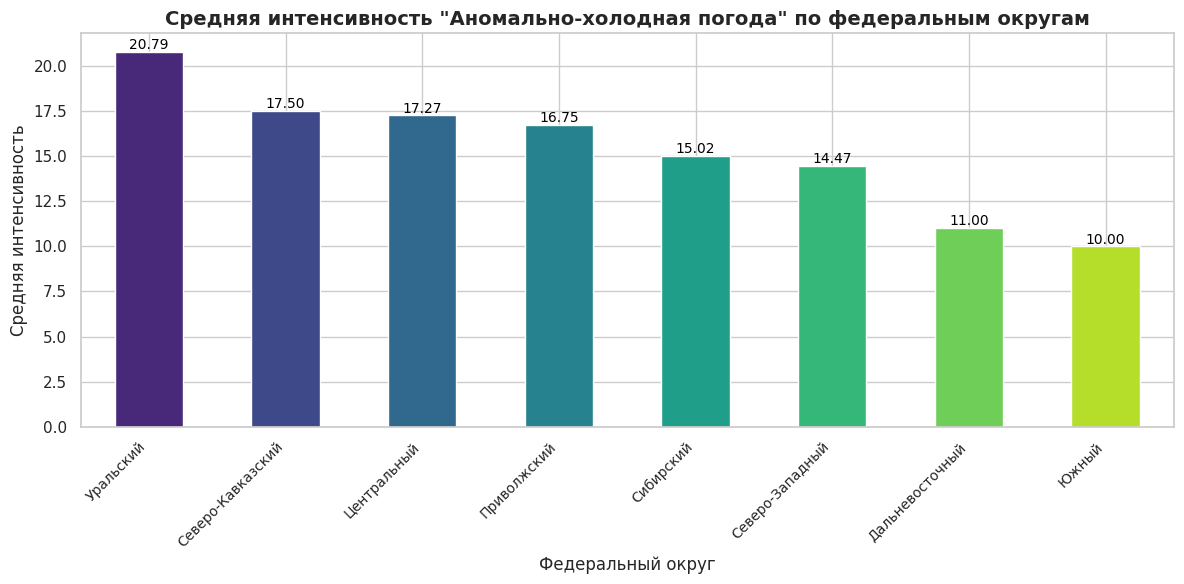

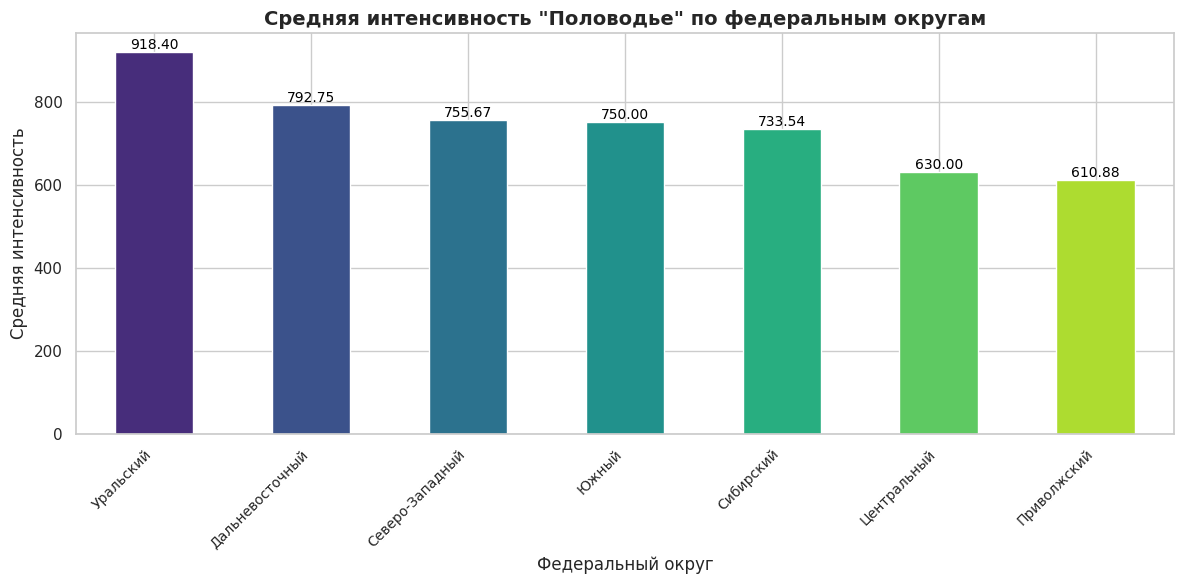

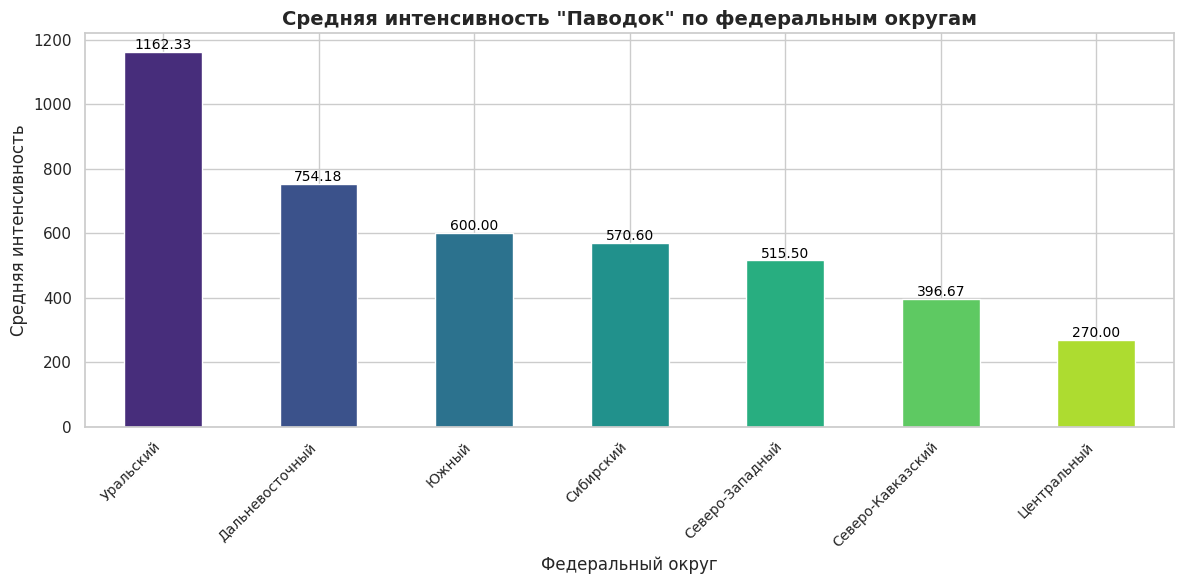

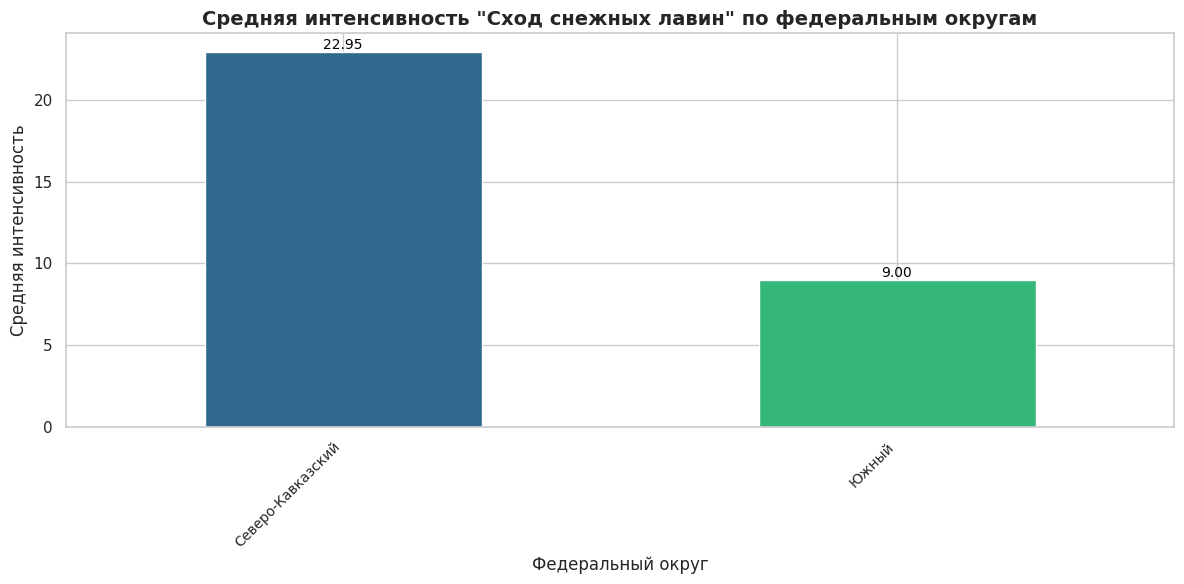

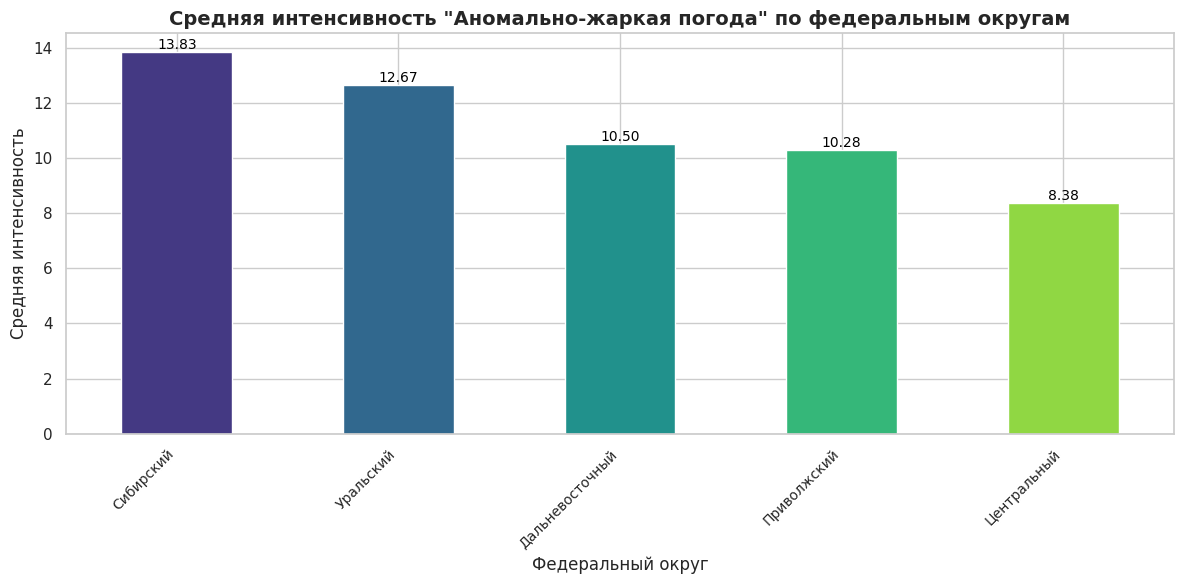

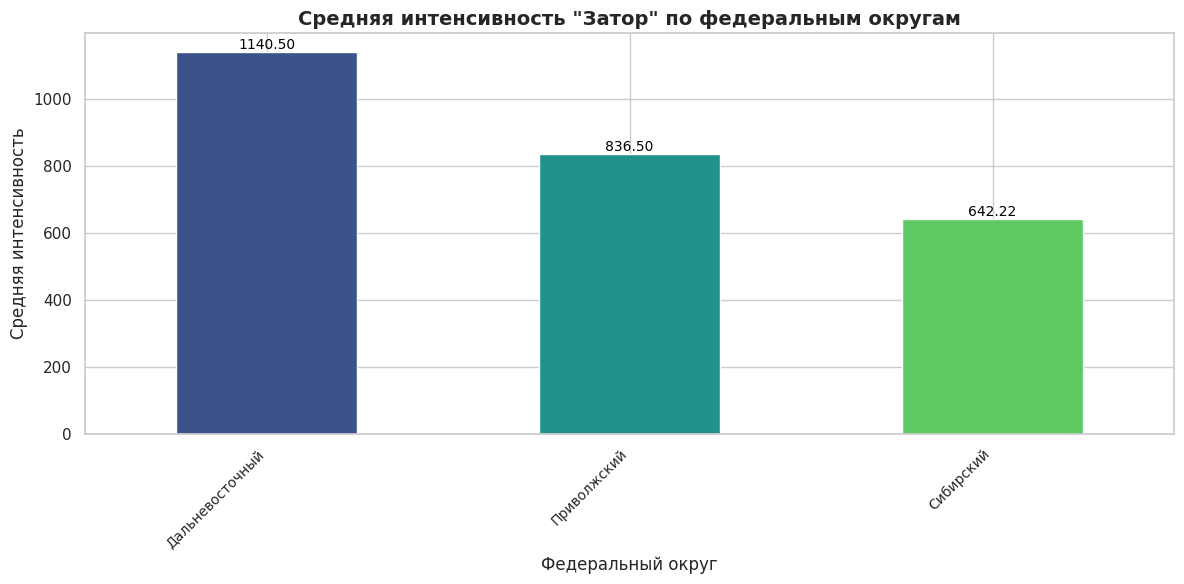

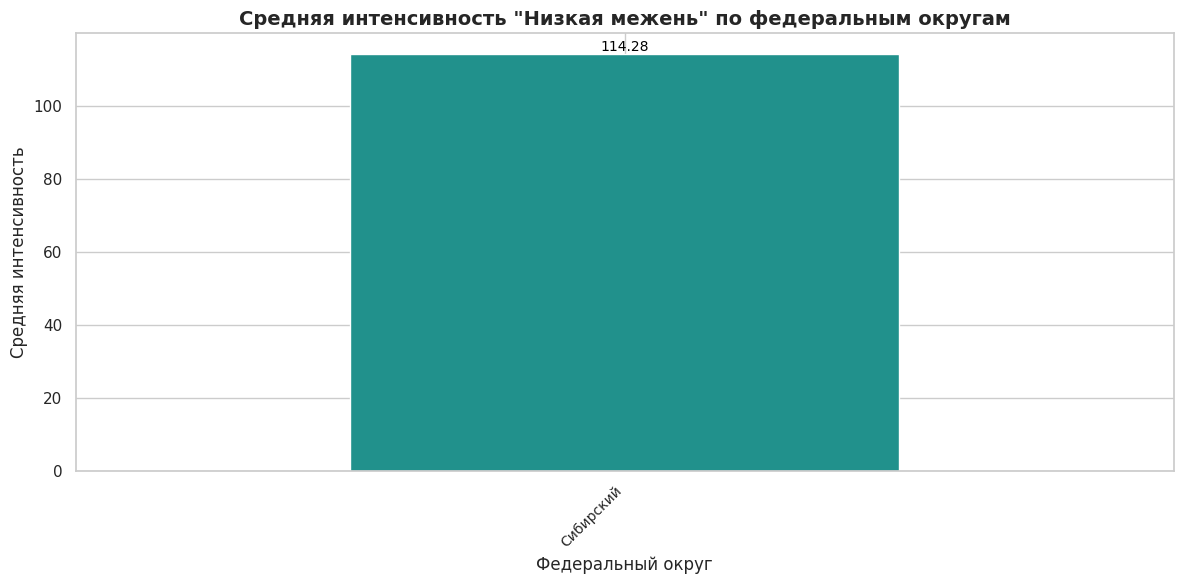

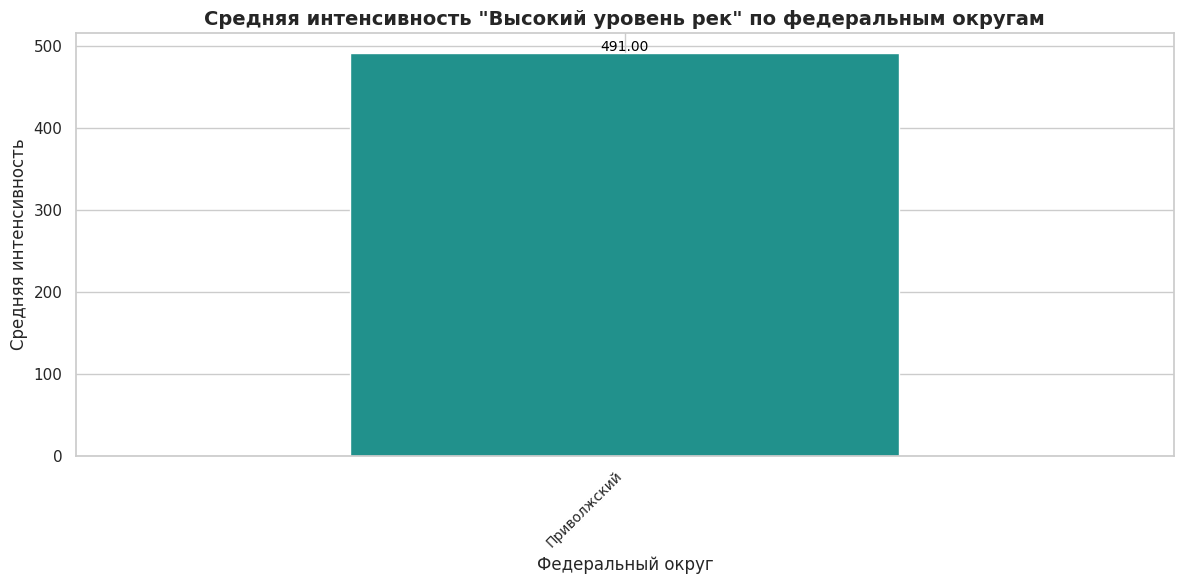

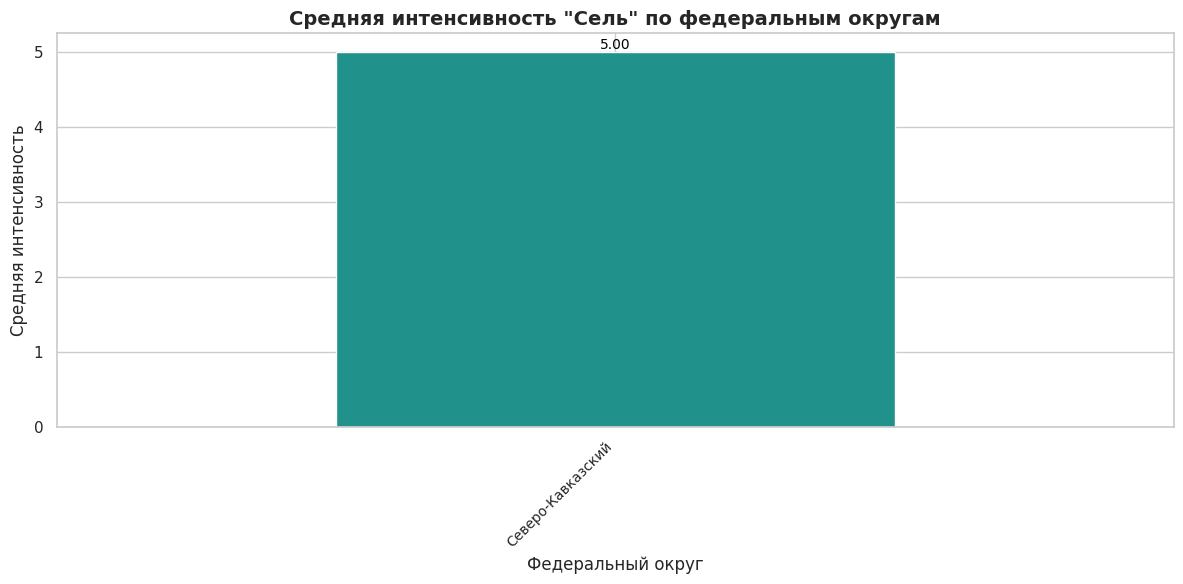

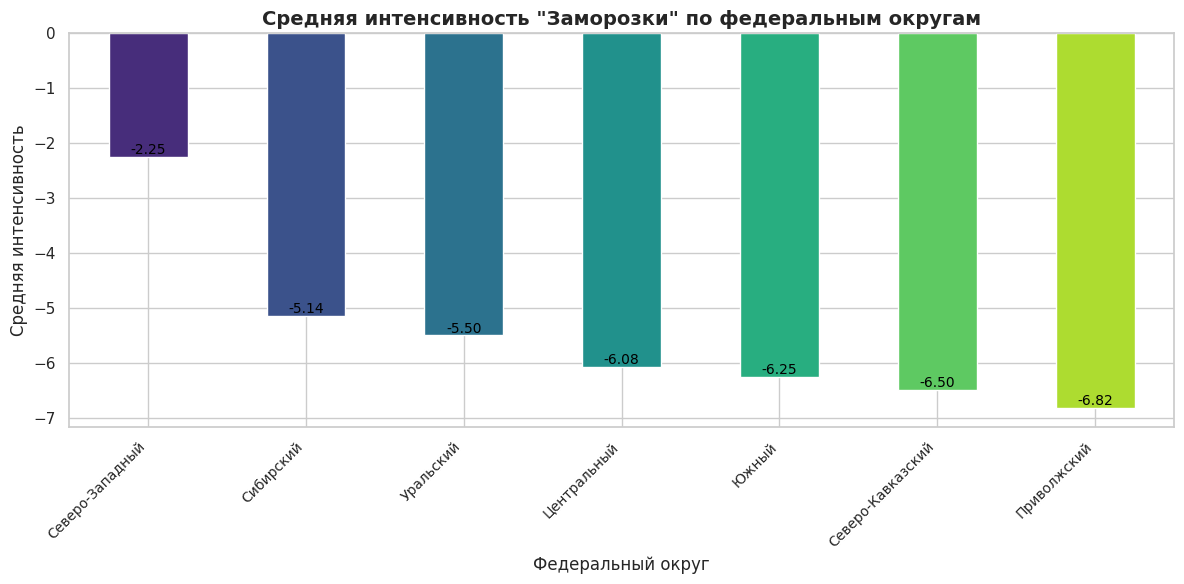

In [104]:
event_names = df.Event_Name.unique()
for i in range(len(event_names)):
  plot_average_intensity_by_district(df, event_names[i])

> **Обработка нескольких явлений:** \
Код проходит по всем уникальным названиям событий в DataFrame и вызывает функцию для каждого из них, что позволяет получить графики для всех типов погодных явлений.

In [105]:
avg_duration_by_district_event = df.groupby(['Event_Name', 'Federal_District'])['Duration'].mean().unstack().fillna(0)
avg_duration_by_district_event

Federal_District,Дальневосточный,Приволжский,Северо-Западный,Северо-Кавказский,Сибирский,Уральский,Центральный,Южный
Event_Name,,,,,,,,
Аномально-жаркая погода,6.750000,10.383333,0.000000,0.000000,5.666667,11.111111,26.653846,0.000000
Аномально-холодная погода,6.333333,9.680556,10.333333,7.500000,8.198276,10.000000,8.575758,2.000000
Ветер,0.746594,0.357522,0.616740,0.398374,0.823529,0.413978,0.623318,0.474576
Высокий уровень рек,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Гололед,1.000000,3.451613,4.250000,3.315789,1.000000,2.000000,4.041667,3.105263
Град,0.000000,0.123711,0.000000,0.163424,0.473684,0.320000,0.147059,0.111765
Дождь,0.816609,0.428571,0.400000,0.731579,0.852632,0.812500,0.440367,0.491379
Заморозки,0.000000,7.545455,1.500000,0.600000,3.500000,7.750000,4.615385,1.000000
Затор,0.500000,0.500000,0.000000,0.000000,2.555556,0.000000,0.000000,0.000000


> **Анализ продолжительности:** \
Код группирует данные по названиям событий и федеральным округам, вычисляя среднюю продолжительность каждого явления, что дает представление о том, как долго каждое событие длится в разных регионах.

# **Анализ экономических рисков от погодных явлений по федеральным округам и временным периодам**

**Цель анализа:** Оценить влияние погодных явлений на различные федеральные округа России и выявить регионы с повышенными рисками.

In [106]:
def plot_event_distribution_by_district(df):
    df['Start_Date'] = pd.to_datetime(df['Start_Date'])

    df['Year'] = df['Start_Date'].dt.year

    event_counts = df.groupby(['Federal_District', 'Year']).size().unstack(fill_value=0)

    for district in event_counts.index:
        plt.figure(figsize=(12, 6))
        sns.barplot(x=event_counts.columns, y=event_counts.loc[district], palette='viridis')
        plt.title(f'Распределение погодных явлений по годам для {district}', fontsize=16)
        plt.xlabel('Год', fontsize=14)
        plt.ylabel('Количество явлений', fontsize=14)
        plt.xticks(rotation=45)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

> **Распределение погодных явлений по годам:** \
Код создает графики, показывающие, как количество погодных явлений изменяется по годам для каждого федерального округа. Это помогает визуализировать тренды и выявлять пики активности.

<ipython-input-106-d541725b09b9>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=event_counts.columns, y=event_counts.loc[district], palette='viridis')


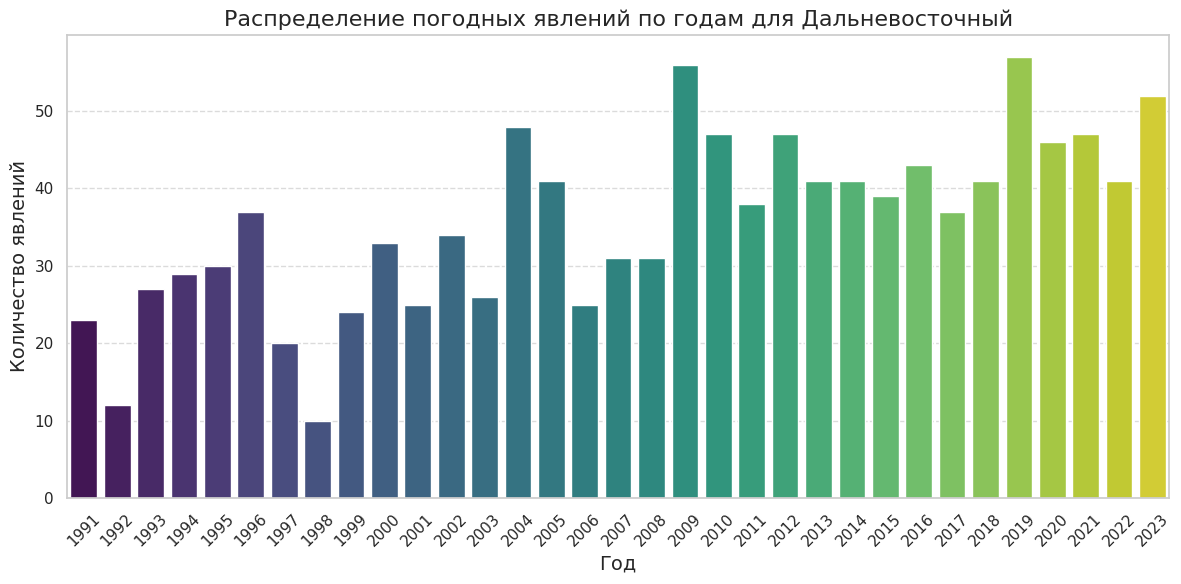

<ipython-input-106-d541725b09b9>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=event_counts.columns, y=event_counts.loc[district], palette='viridis')


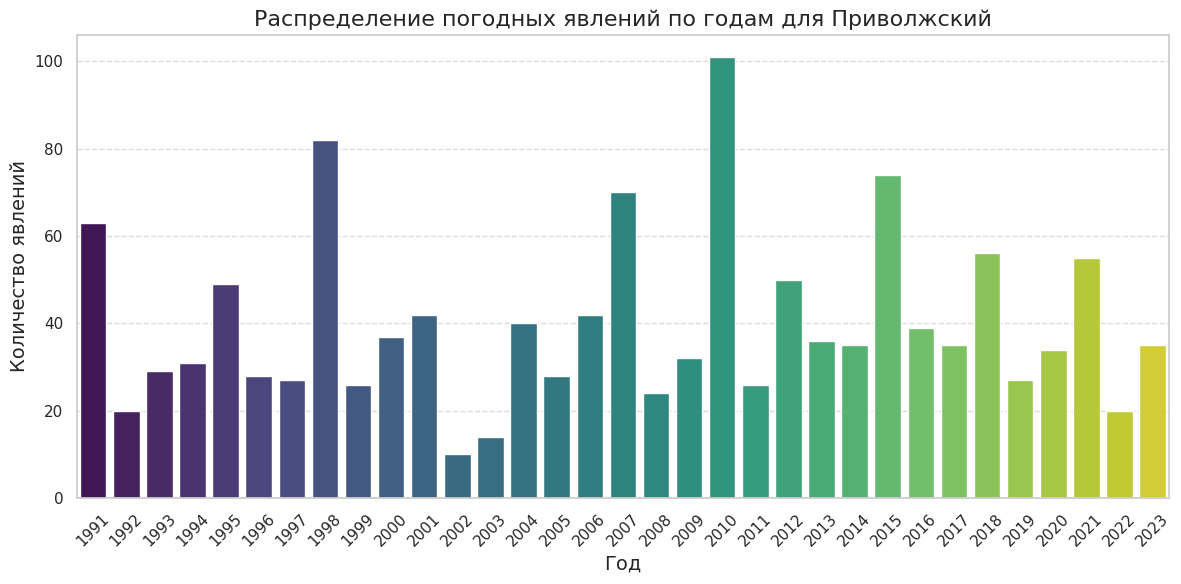

<ipython-input-106-d541725b09b9>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=event_counts.columns, y=event_counts.loc[district], palette='viridis')


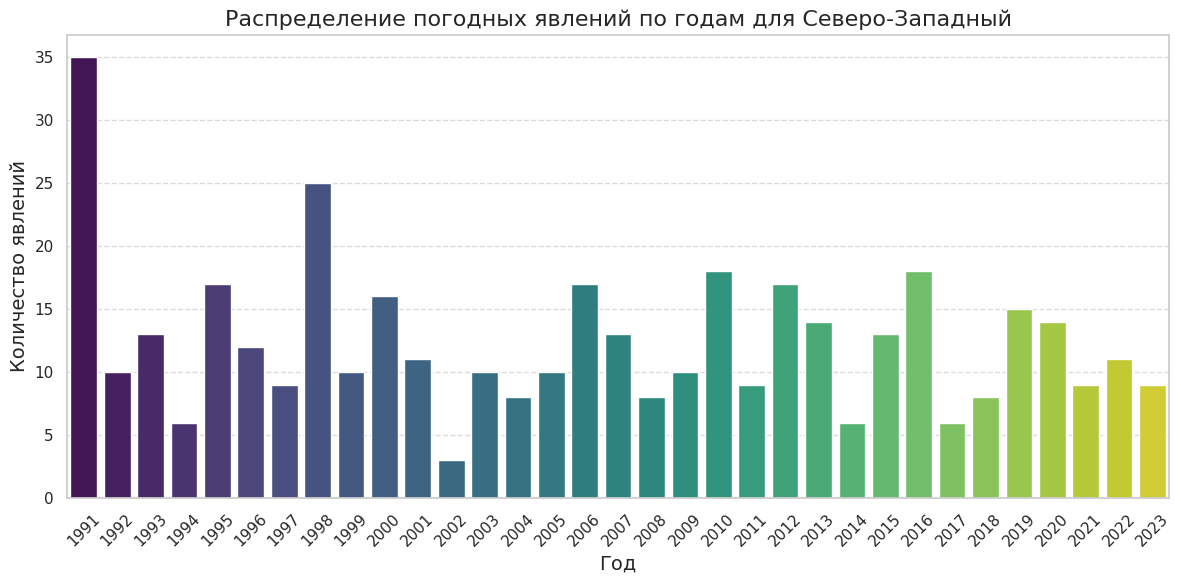

<ipython-input-106-d541725b09b9>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=event_counts.columns, y=event_counts.loc[district], palette='viridis')


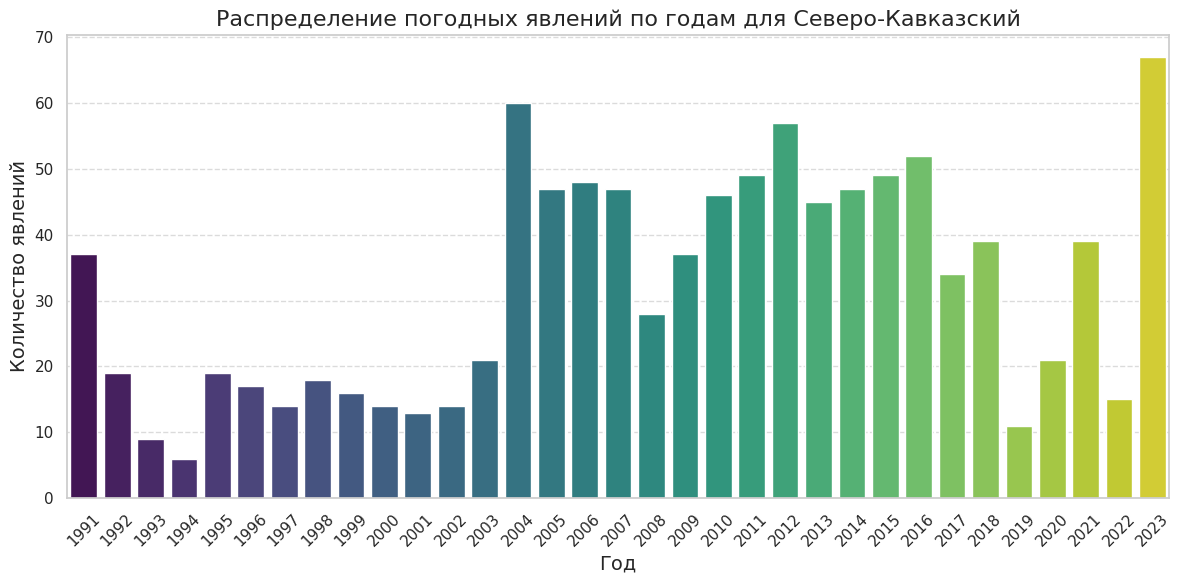

<ipython-input-106-d541725b09b9>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=event_counts.columns, y=event_counts.loc[district], palette='viridis')


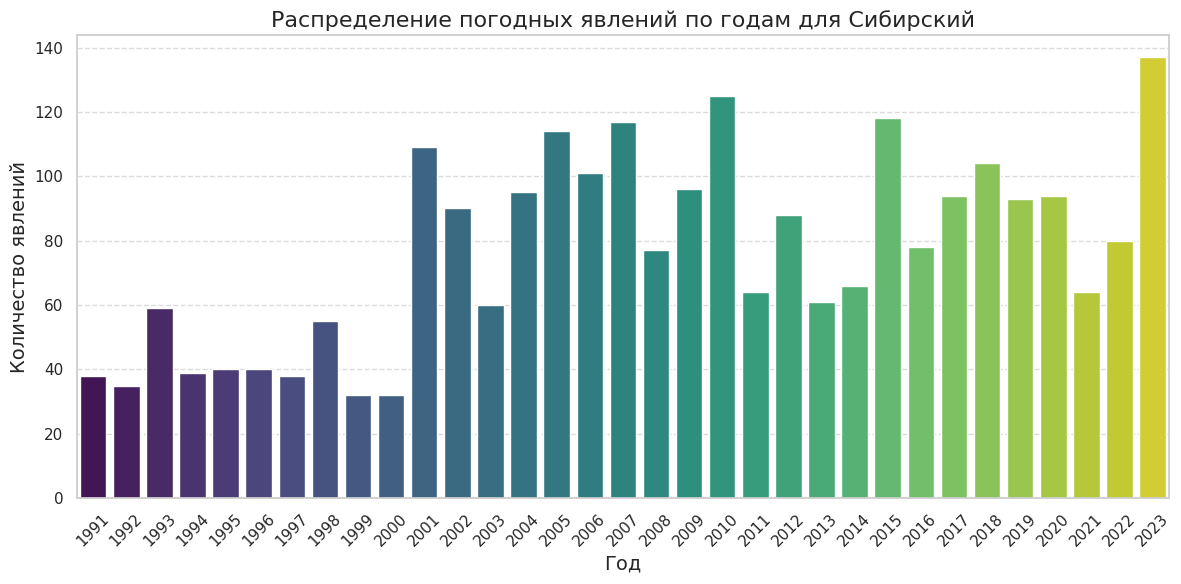

<ipython-input-106-d541725b09b9>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=event_counts.columns, y=event_counts.loc[district], palette='viridis')


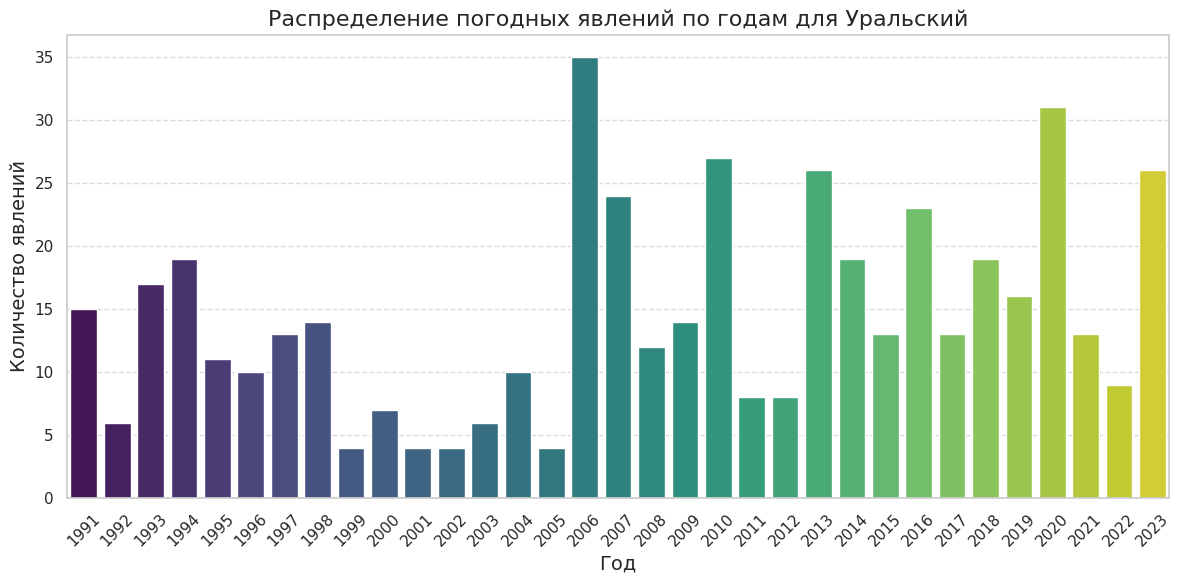

<ipython-input-106-d541725b09b9>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=event_counts.columns, y=event_counts.loc[district], palette='viridis')


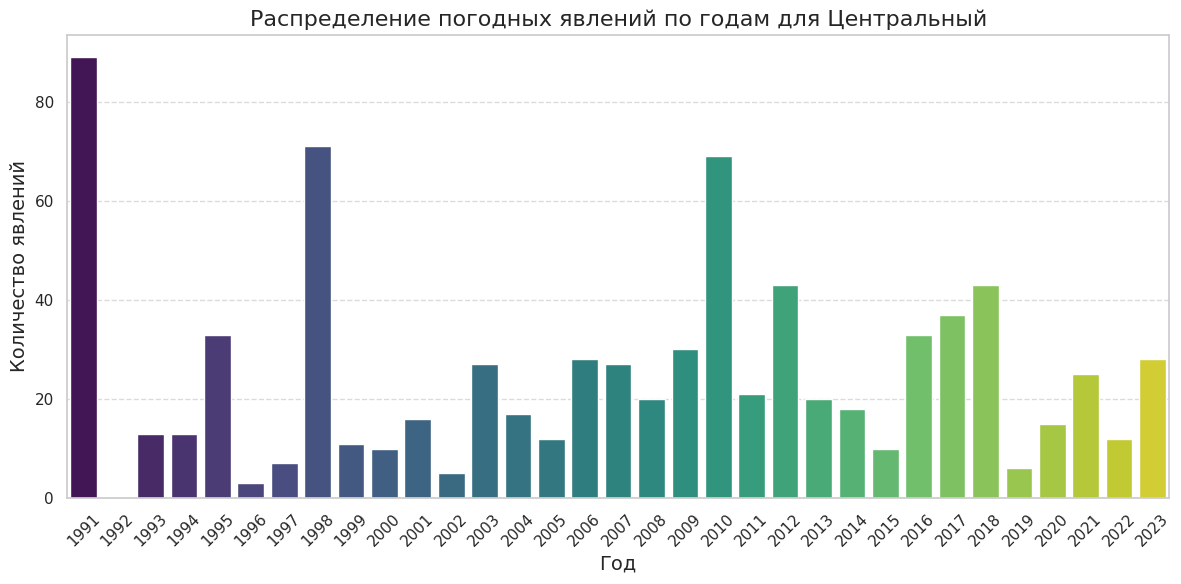

<ipython-input-106-d541725b09b9>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=event_counts.columns, y=event_counts.loc[district], palette='viridis')


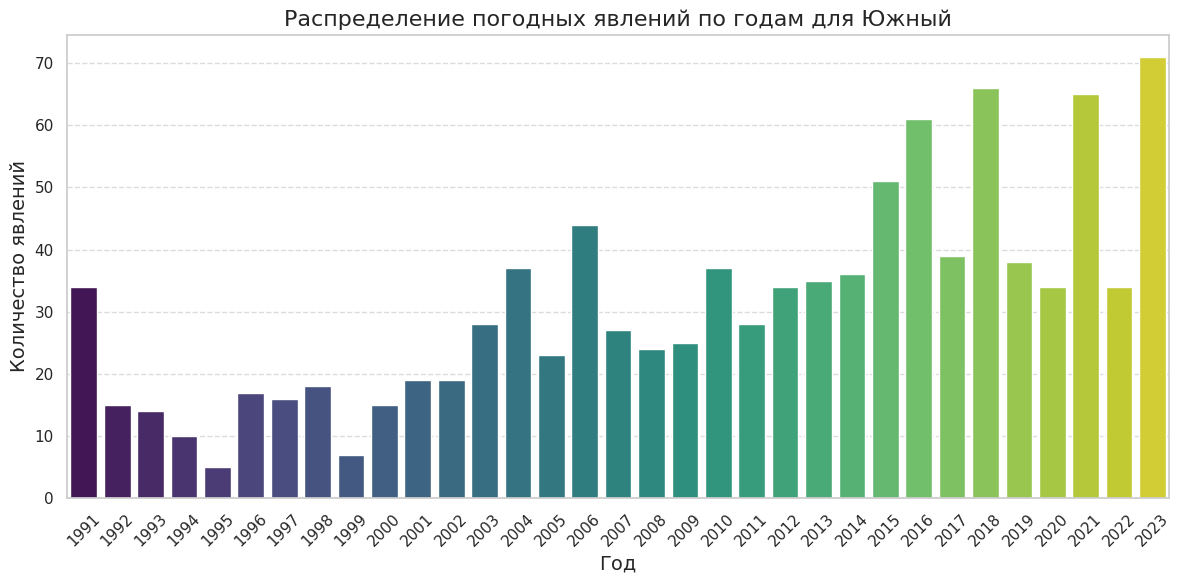

In [107]:
plot_event_distribution_by_district(df)

In [108]:
df['Start_Date'] = pd.to_datetime(df['Start_Date'])
df['Year'] = df['Start_Date'].dt.year

In [109]:
risk_analysis = df.groupby(['Federal_District', 'Year']).size().reset_index(name='Event_Count')

In [110]:
high_risk_regions = risk_analysis[risk_analysis['Event_Count'] > risk_analysis['Event_Count'].mean()]
high_risk_regions

,Federal_District,Year,Event_Count
5,Дальневосточный,1996,37
11,Дальневосточный,2002,34
13,Дальневосточный,2004,48
14,Дальневосточный,2005,41
18,Дальневосточный,2009,56
...,...,...,...
258,Южный,2019,38
259,Южный,2020,34
260,Южный,2021,65
261,Южный,2022,34


> **Анализ рисков:** \
* Код группирует данные по федеральным округам и годам, подсчитывает количество событий и определяет регионы с высоким риском, основываясь на среднем количестве явлений.
* Выявление регионов с количеством событий выше среднего позволяет сосредоточить внимание на тех областях, которые могут быть более подвержены экономическим рискам из-за частых погодных явлений.

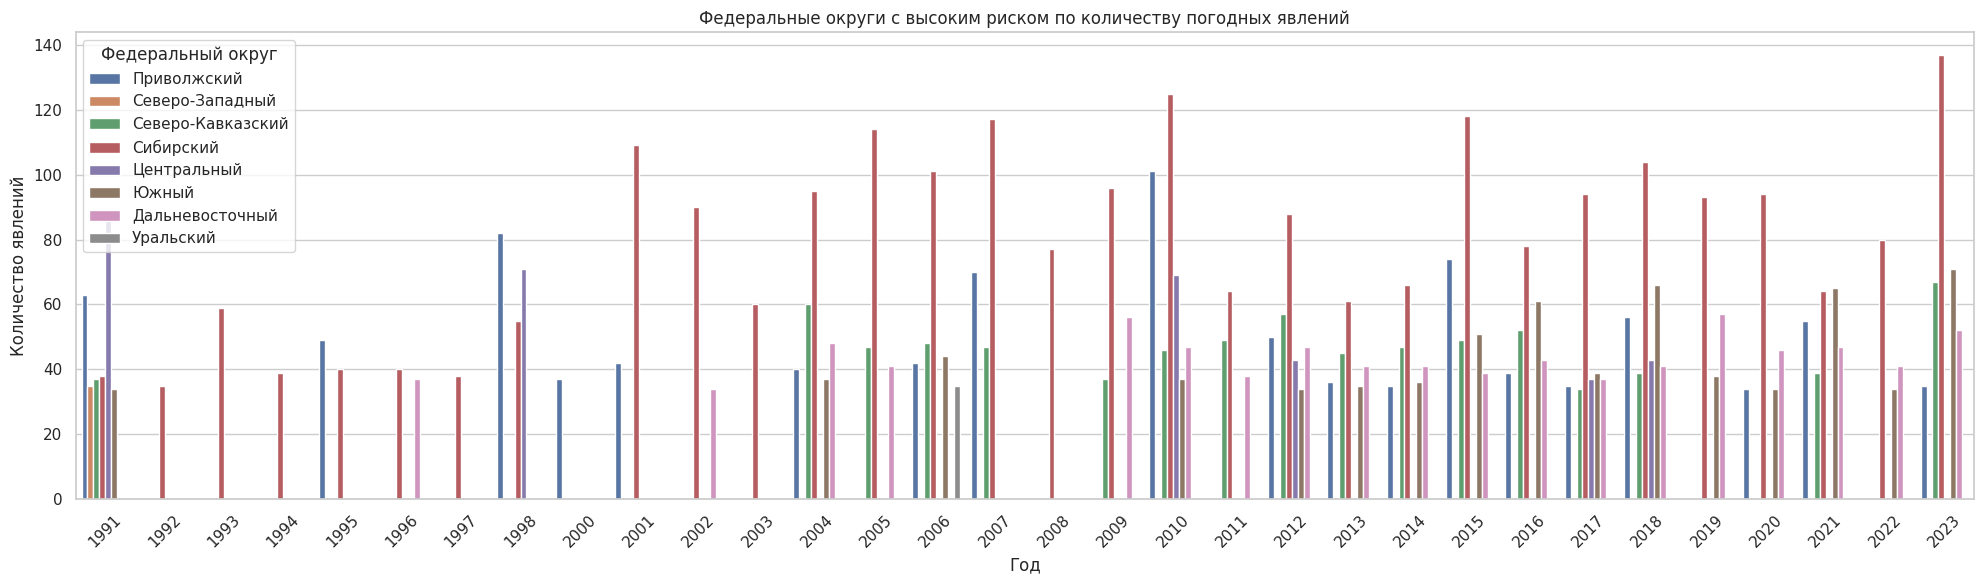

In [111]:
plt.figure(figsize=(20, 6))
sns.barplot(data=high_risk_regions, x='Year', y='Event_Count', hue='Federal_District')
plt.title('Федеральные округи с высоким риском по количеству погодных явлений')
plt.xlabel('Год')
plt.ylabel('Количество явлений')
plt.xticks(rotation=45)
plt.legend(title='Федеральный округ')
plt.tight_layout()
plt.show()

> **Визуализация рисков:** \
Создается столбчатый график, который показывает количество погодных явлений для федеральных округов с высоким риском, что позволяет легко сравнивать данные между регионами.

# **Определение пар явлений, которые чаще всего наблюдаются одновременно**

**Цель анализа:** Выявить сочетания погодных явлений, которые происходят одновременно, что может быть полезно для оценки рисков и подготовки к потенциальным последствиям.

In [112]:
event_groups = df.groupby(['Start_Date'])['Event_Name'].apply(list).reset_index()

> **Группировка событий по дате:** \
Код группирует данные по дате начала (`Start_Date`), собирая все названия событий, которые произошли в один и тот же день.

In [113]:
def find_event_pairs(events):
    return list(combinations(sorted(set(events)), 2))

> **Поиск пар явлений:** \
Функция `find_event_pairs` создает все возможные пары из уникальных названий событий для каждой даты, что позволяет выявить, какие явления происходят одновременно.

In [114]:
event_pairs = event_groups['Event_Name'].apply(find_event_pairs)

In [115]:
pairs_flat = [pair for sublist in event_pairs for pair in sublist]

In [116]:
pair_counts = pd.Series(pairs_flat).value_counts().reset_index()
pair_counts.columns = ['Event_Pair', 'Count']
pair_counts

,Event_Pair,Count
0,"(Ветер, Дождь)",264
1,"(Ветер, Метель)",252
2,"(Ветер, Град)",230
3,"(Дождь, Ливень)",189
4,"(Град, Дождь)",170
...,...,...
108,"(Град, Метель)",1
109,"(Продолжительный дождь, Сильная жара)",1
110,"(Метель, Сход снежных лавин)",1
111,"(Аномально-жаркая погода, Половодье)",1


> **Подсчет частоты пар:** \
Создается плоский список всех пар, а затем подсчитывается количество появлений каждой пары, что позволяет определить, какие сочетания погодных явлений наблюдаются чаще всего.